In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv("surface temperature anomalies by year.csv")

# Rename the first column to 'Country'
df.rename(columns={df.columns[0]: 'Country'}, inplace=True)

# Display first few rows
df.head()


,Country,2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,2022,Unnamed: 6,Unnamed: 7,Unnamed: 8,2021,...,Unnamed: 207,Unnamed: 208,1971,Unnamed: 210,Unnamed: 211,Unnamed: 212,1970,Unnamed: 214,Unnamed: 215,Unnamed: 216
0,Country / Area,1.0,12.0,Absolute Change,Relative Change,1.00,12.00,Absolute Change,Relative Change,1.00,...,Absolute Change,Relative Change,1.00,12.00,Absolute Change,Relative Change,1.00,12.00,Absolute Change,Relative Change
1,Afghanistan,-3.1,3.1,6.2,200%,0.92,0.23,-0.69,-75%,0.24,...,-1.3,-77%,-1.48,2.92,4.4,297%,-0.38,0.18,0.55,147%
2,Albania,2.4,2.4,0,2%,-0.22,3.92,4.14,1874%,1.36,...,-2.23,-173%,2.44,-0.92,-3.36,-138%,1.91,0.36,-1.55,-81%
3,Algeria,0.3,0.9,0.6,209%,-0.39,3.69,4.09,1039%,2.39,...,-1.96,-382%,0.01,-0.56,-0.57,-5760%,2.47,-0.52,-2.99,-121%
4,Ameran Samoa,-0.3,0.1,0.4,147%,0.28,-0.26,-0.54,-194%,-0.24,...,0.71,87%,-0.61,-0.61,0.01,1%,0.08,-0.72,-0.81,-960%


In [ ]:
# Extract columns that are years
year_columns = [col for col in df.columns if col.isdigit()]

# Filter for year columns + country
df_years = df[['Country'] + year_columns]

# Convert year values to numeric
df_years[year_columns] = df_years[year_columns].apply(pd.to_numeric, errors='coerce')

# Drop countries with too many missing values
df_years_cleaned = df_years.dropna(thresh=len(year_columns)//2)
df_years_cleaned.set_index("Country", inplace=True)

df_years_cleaned.head()


<ipython-input-12-b8e0b0600f5d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years[year_columns] = df_years[year_columns].apply(pd.to_numeric, errors='coerce')


,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1979,1978,1977,1976,1975,1974,1973,1972,1971,1970
Country,,,,,,,,,,,,,,,,,,,,,
Country / Area,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Afghanistan,-3.1,0.92,0.24,-1.32,1.83,2.29,0.80,2.35,2.01,0.81,...,0.42,-1.72,-2.99,1.21,-2.10,-1.80,-4.06,-1.68,-1.48,-0.38
Albania,2.4,-0.22,1.36,0.45,-1.95,1.75,-3.01,0.79,0.17,3.20,...,-1.65,-0.66,0.61,-0.15,-0.89,0.00,-0.43,1.29,2.44,1.91
Algeria,0.3,-0.39,2.39,0.22,-0.81,1.60,-1.66,2.37,-0.60,1.52,...,3.14,0.23,0.98,-1.91,-2.04,-0.81,-1.88,-0.51,0.01,2.47
Ameran Samoa,-0.3,0.28,-0.24,0.11,0.82,-0.03,0.54,0.61,0.47,-0.40,...,-0.27,-0.45,-0.08,-1.21,-0.57,-0.93,-0.18,-0.81,-0.61,0.08


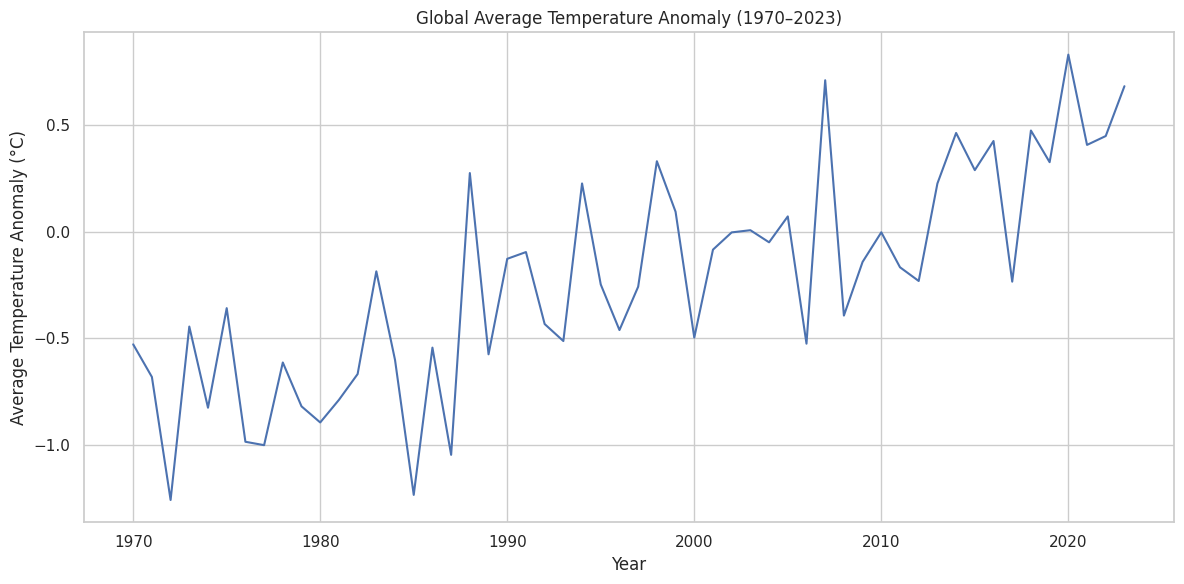

In [ ]:
global_trend = df_years_cleaned.mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=global_trend.index.astype(int), y=global_trend.values)
plt.title("Global Average Temperature Anomaly (1970–2023)")
plt.xlabel("Year")
plt.ylabel("Average Temperature Anomaly (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


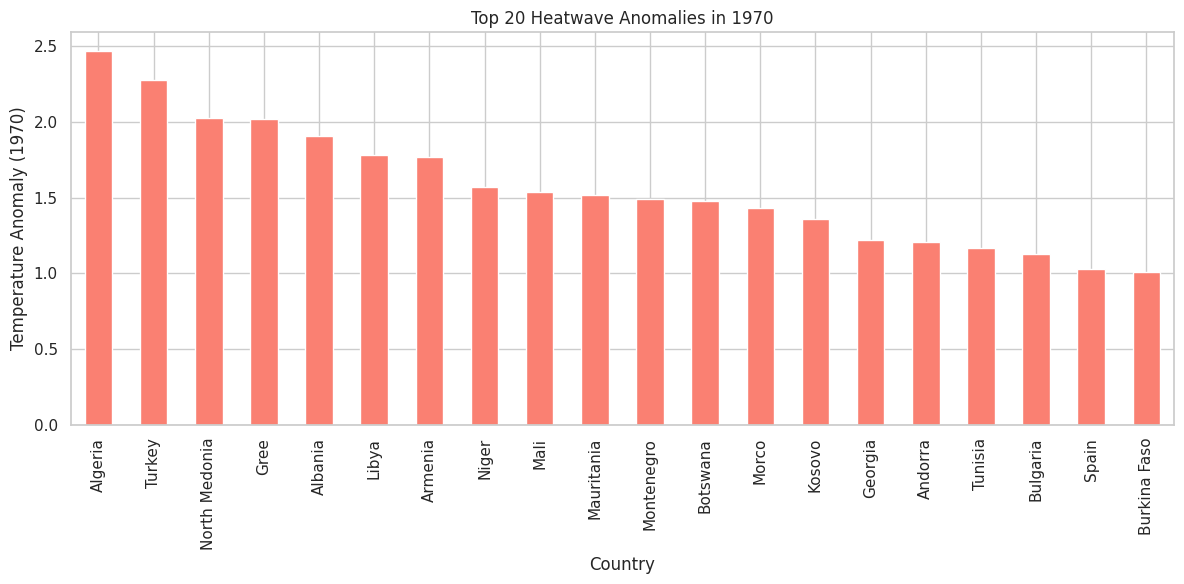

In [ ]:
latest_year = str(global_trend.index[-1])

plt.figure(figsize=(12, 6))
df_years_cleaned[latest_year].sort_values(ascending=False).head(20).plot(kind='bar', color='salmon')
plt.title(f"Top 20 Heatwave Anomalies in {latest_year}")
plt.xlabel("Country")
plt.ylabel(f"Temperature Anomaly ({latest_year})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


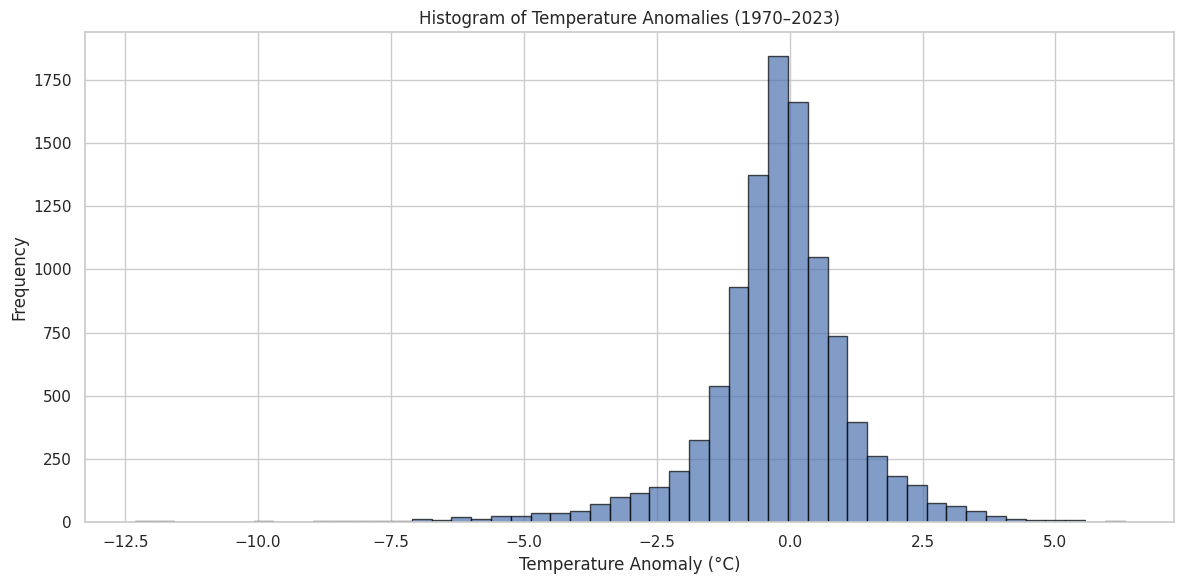

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df_years_cleaned.values.flatten(), bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of Temperature Anomalies (1970–2023)")
plt.xlabel("Temperature Anomaly (°C)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



Root Mean Squared Error (RMSE) on Test Set: 0.5006


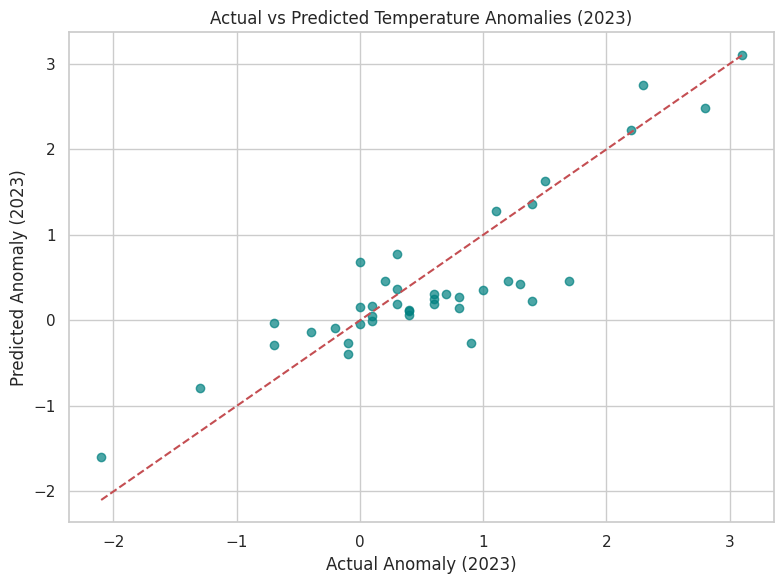

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


X = df_years_cleaned[[str(year) for year in range(1970, 2023)]]
y = df_years_cleaned["2023"]

X = X.dropna()
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Anomaly (2023)")
plt.ylabel("Predicted Anomaly (2023)")
plt.title("Actual vs Predicted Temperature Anomalies (2023)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Define a threshold for "high anomaly" alert
alert_threshold = 2.5  # You can adjust this value as needed

# Create alert messages for countries exceeding the threshold
alerts = []

for country, prediction in zip(y_test.index, y_pred):
    if prediction > alert_threshold:
        alerts.append(f"⚠️ Alert: {country} is predicted to have a high temperature anomaly of {prediction:.2f}°C in 2023.")

# Display the alerts
if alerts:
    print("\n".join(alerts))
else:
    print("✅ No countries exceeded the anomaly threshold.")


⚠️ Alert: Gree is predicted to have a high temperature anomaly of 2.76°C in 2023.
⚠️ Alert: Croatia is predicted to have a high temperature anomaly of 3.11°C in 2023.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')